In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from prepData import *
from math import sqrt
from sklearn.neural_network import MLPRegressor
from plotterUtils import *
from matplotlib.colors import LogNorm

In [2]:
#df_perjet = jet_level_data()
df = pd.read_pickle('new_withCNN_withRF.pkl')

In [3]:

featureNames = ['jet_pt_ak7','jet_eta_ak7',
                 'jet_photon_frac_ak7',
                 'jet_electron_frac_ak7',
                 'jet_muon_frac_ak7',
                 'jet_neutHad_frac_ak7',
                 'jet_charHad_frac_ak7_log',
                 'jet_electron_mult_ak7',
                 'jet_muon_mult_ak7',
                 'jet_photon_mult_ak7',
                 'jet_neutHad_mult_ak7',
                 'jet_charHad_mult_ak7'
                ]

allFeatures = ['jet_pt_ak7','jet_eta_ak7',
                 'jet_photon_frac_ak7',
                 'jet_electron_frac_ak7',
                 'jet_muon_frac_ak7',
                 'jet_neutHad_frac_ak7',
                 'jet_charHad_frac_ak7',
                 'jet_electron_mult_ak7',
                 'jet_muon_mult_ak7',
                 'jet_photon_mult_ak7',
                 'jet_neutHad_mult_ak7',
                 'jet_charHad_mult_ak7'
                ]

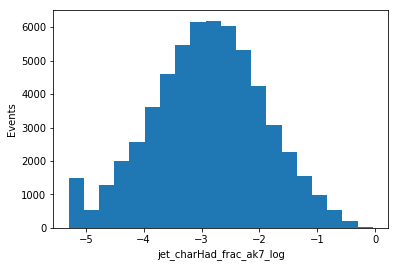

scaling jet_eta_ak7
-0.000844838822256 1.01956513602
scaling jet_photon_frac_ak7
0.281332814022 0.139899407881
scaling jet_electron_frac_ak7
0.0098703265336 0.0547786151486
scaling jet_muon_frac_ak7
0.002251110337 0.0189029199639
scaling jet_neutHad_frac_ak7
0.634559508481 0.169518843594
scaling jet_charHad_frac_ak7_log
-2.90077534957 0.982918785309
scaling jet_electron_mult_ak7
0.0961945213489 0.310703255731
scaling jet_muon_mult_ak7
0.0394132718862 0.206328802288
scaling jet_photon_mult_ak7
18.7823843998 8.25438904045
scaling jet_neutHad_mult_ak7
28.6239230994 10.7851209899
scaling jet_charHad_mult_ak7
4.04613691469 2.28242975253


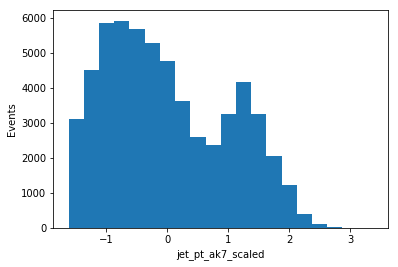

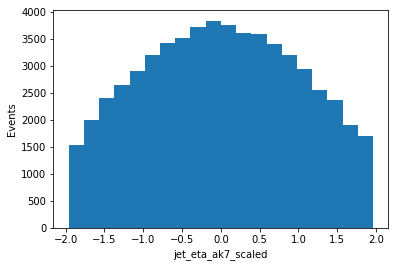

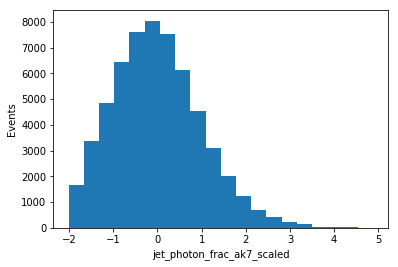

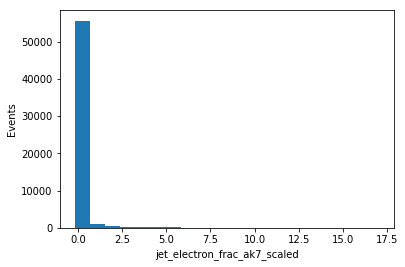

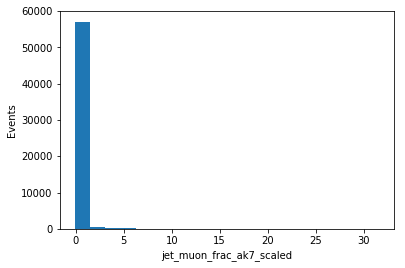

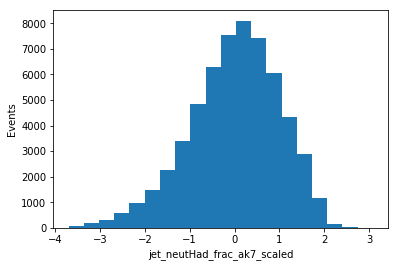

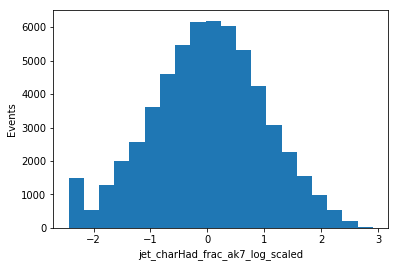

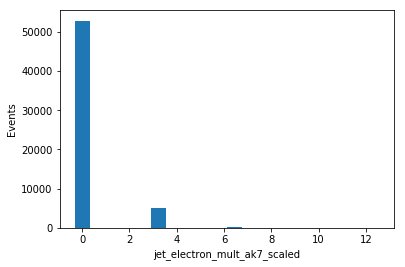

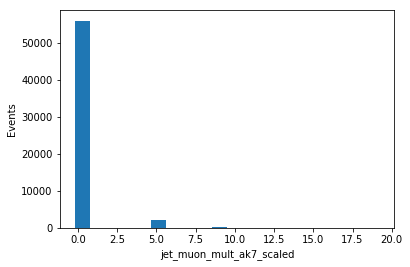

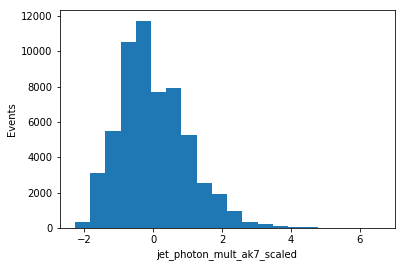

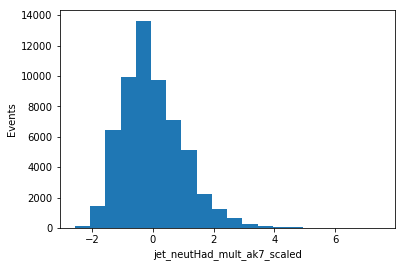

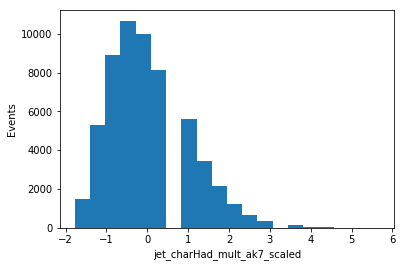

In [4]:
scaleData = True
if( scaleData ):
    
    df['jet_charHad_frac_ak7_log'] = map(lambda x : np.log(x+0.005),df['jet_charHad_frac_ak7'])
    plt.hist(df['jet_charHad_frac_ak7_log'],20)
    plt.xlabel('jet_charHad_frac_ak7_log')
    plt.ylabel("Events")
    plt.show()    
    
    normalFeatures = ['jet_eta_ak7',
                 'jet_photon_frac_ak7',
                 'jet_electron_frac_ak7',
                 'jet_muon_frac_ak7',
                 'jet_neutHad_frac_ak7',
                 'jet_charHad_frac_ak7_log',
                 'jet_electron_mult_ak7',
                 'jet_muon_mult_ak7',
                 'jet_photon_mult_ak7',
                 'jet_neutHad_mult_ak7',
                 'jet_charHad_mult_ak7'
                ]
    
    for f in normalFeatures:
        print "scaling",f
        mean_ = np.mean(df[f])
        rms_ = np.std(df[f])
        print mean_,rms_
        df[f+'_scaled'] = map(lambda x : (x-mean_)/rms_,df[f])

    for i,f in enumerate(featureNames):
        if( f == 'jet_charHad_frac_ak7') : 
            f = 'jet_charHad_frac_ak7_log'
        plt.hist(df[f+'_scaled'],20)
        plt.xlabel(f+'_scaled')
        plt.ylabel("Events")
        plt.show()

In [5]:
for i,f in enumerate(featureNames):
    featureNames[i] = f+"_scaled"
featureNames

['jet_pt_ak7_scaled',
 'jet_eta_ak7_scaled',
 'jet_photon_frac_ak7_scaled',
 'jet_electron_frac_ak7_scaled',
 'jet_muon_frac_ak7_scaled',
 'jet_neutHad_frac_ak7_scaled',
 'jet_charHad_frac_ak7_log_scaled',
 'jet_electron_mult_ak7_scaled',
 'jet_muon_mult_ak7_scaled',
 'jet_photon_mult_ak7_scaled',
 'jet_neutHad_mult_ak7_scaled',
 'jet_charHad_mult_ak7_scaled']

In [6]:
df = df.sample(frac=1)
df_train,df_test = np.array_split(df,2)

In [69]:
df_train,df_test = np.array_split(df,2)

model = MLPRegressor(hidden_layer_sizes=[200,200,200,200],activation='relu',random_state=12345)
model.fit(df_train[featureNames],df_train['jet_jes_ak7'])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[200, 200, 200, 200], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [70]:
df_train['prediction_MLP'] = model.predict(df_train[featureNames])
df_train['residual_MLP'] = df_train['prediction_MLP']-df_train['jet_jes_ak7']
df_train['sq_diff'] = map(lambda x : x*x,df_train['residual_MLP'])
print "RMSE:",sqrt(sum(df_train['sq_diff'])/len(df_train['sq_diff']))
df_test['prediction_MLP'] = model.predict(df_test[featureNames])
df_test['residual_MLP'] = df_test['prediction_MLP']-df_test['jet_jes_ak7']
df_test['sq_diff'] = map(lambda x : x*x,df_test['residual_MLP'])
print "RMSE:",sqrt(sum(df_test['sq_diff'])/len(df_test['sq_diff']))

RMSE: 0.0111717403175
RMSE: 0.0122275356066


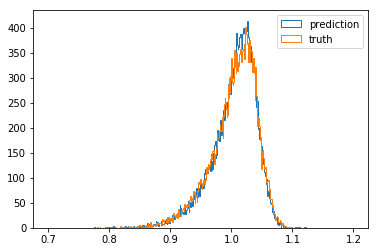

In [71]:
plt.hist(df_test['prediction_MLP'],np.arange(0.7,1.2,0.001),histtype='step')
plt.hist(df_test['jet_jes_ak7'],np.arange(0.7,1.2,0.001),histtype='step')
plt.legend(['prediction','truth'])
plt.show()

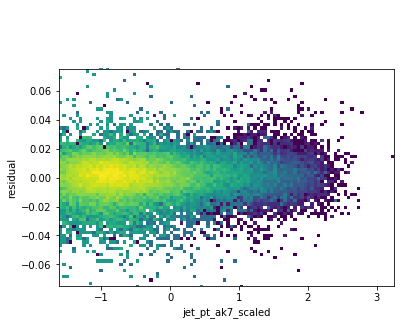

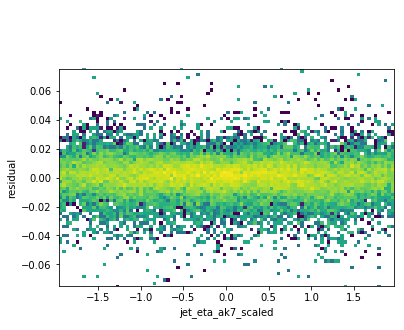

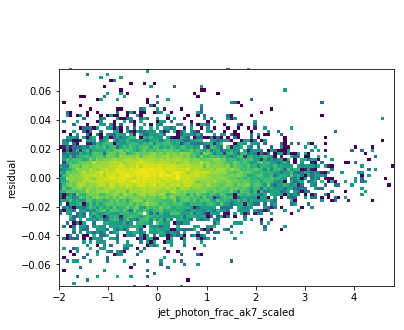

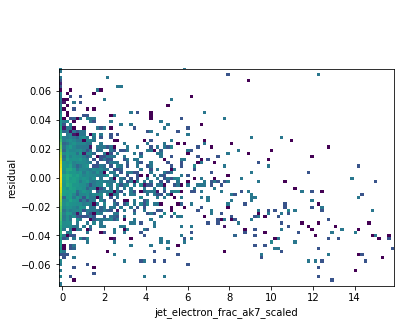

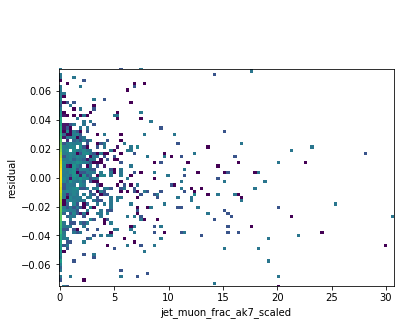

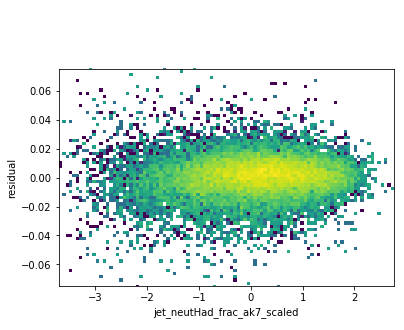

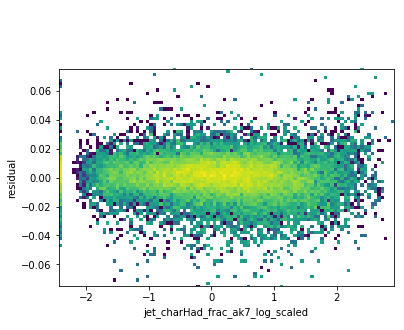

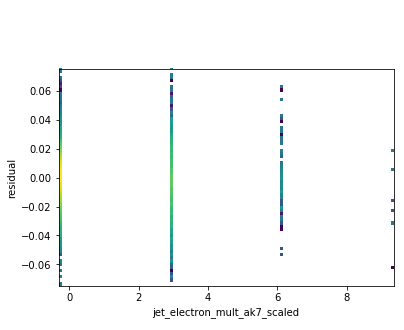

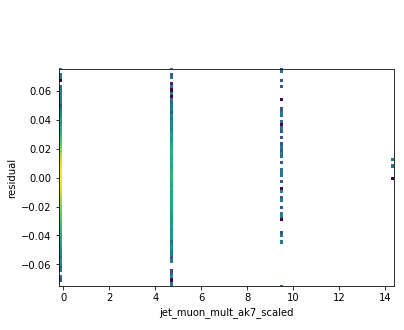

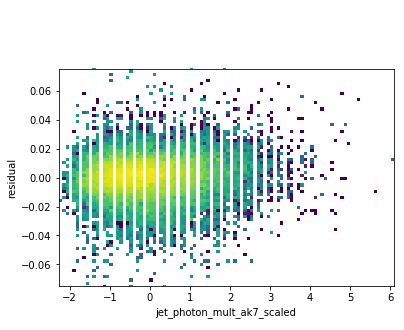

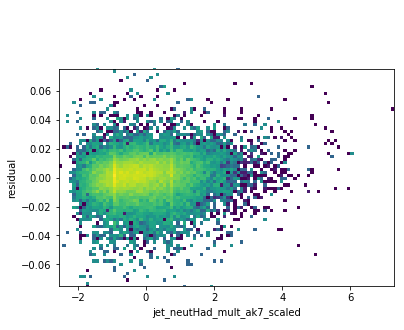

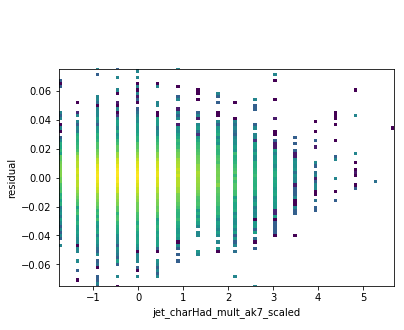

In [72]:
for i,f in enumerate(featureNames):
    plt.hist2d(df_test[f],df_test['residual_MLP'],weights=df_test['mcweight'],bins=(100,100),norm=LogNorm())
    plt.xlabel(f)
    plt.ylabel("residual")
    plt.ylim(-.075,.075)
    plt.show()

In [54]:
def residual_profile(indep_var,dep_var,c,low_bin,high_bin,nbins):
    print "plot_var:",indep_var
    print "low_bin:",low_bin
    print "high_bin:",high_bin
    print "nbins:",nbins
    df_test[indep_var+'_bins'] = pd.cut(df_test[indep_var],np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins)),labels=range(nbins))
    means = df_test.groupby([indep_var+'_bins']).mean()[dep_var].values
    counts = df_test.groupby([indep_var+'_bins']).count()[dep_var].values
    sqrt_counts = map(sqrt,counts)
    errs  = df_test.groupby([indep_var+'_bins']).std()[dep_var].values
    errs = errs/sqrt_counts
    bin_center=np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins))
    bin_center = bin_center[:-1]
    bin_center = map(lambda x : x+(high_bin-low_bin)/float(nbins)/2.,bin_center)
    plt.errorbar(x=bin_center,y=means,yerr=errs,fmt='o',color=c)
    plt.xlabel(indep_var)
    plt.ylabel("<residual>")
    plt.ylim(-0.05,0.05)

plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90
plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90
plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90
plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90


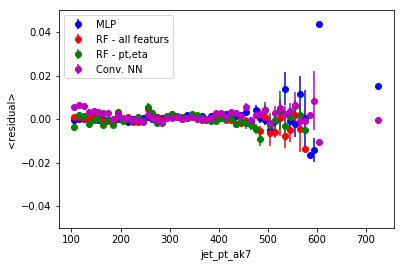

plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60
plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60
plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60
plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60


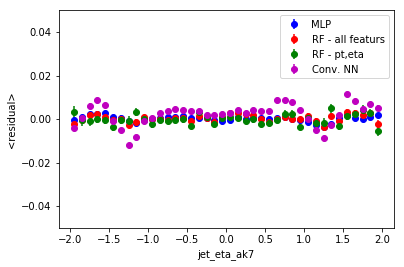

plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


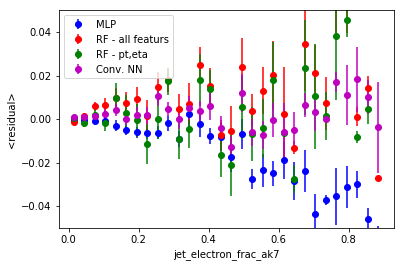

plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


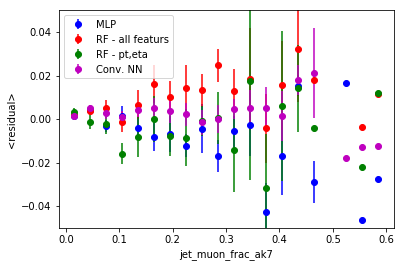

plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


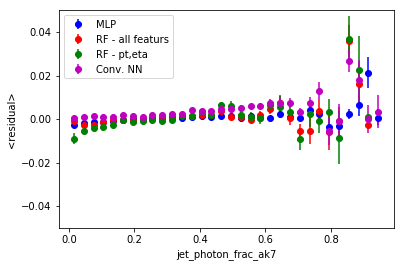

plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


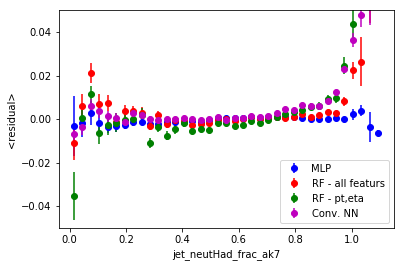

plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


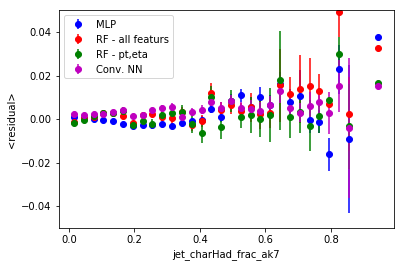

plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


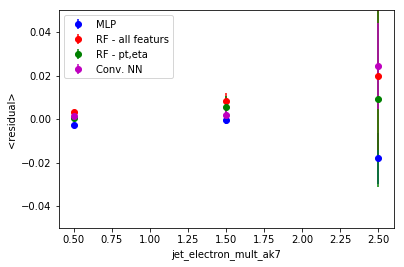

plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


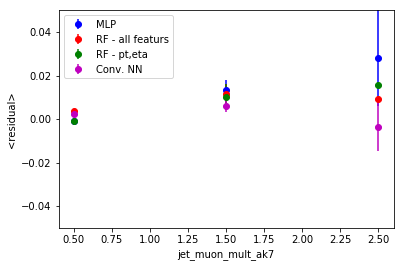

plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


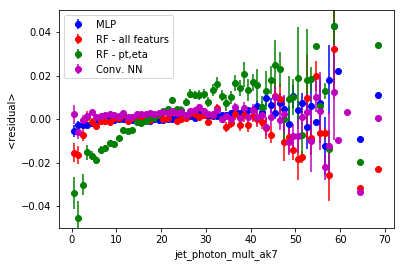

plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


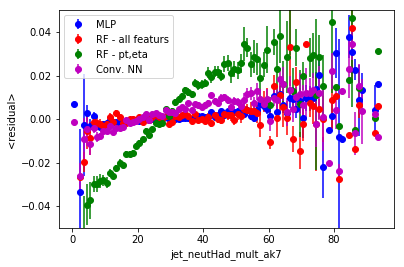

plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


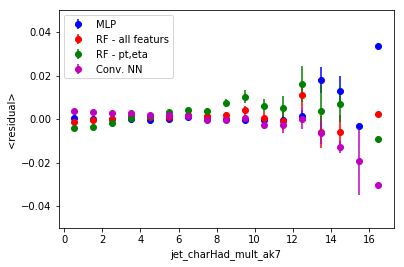

In [73]:
plot_vars=['jet_pt_ak7','jet_eta_ak7','jet_electron_frac_ak7','jet_muon_frac_ak7','jet_photon_frac_ak7','jet_neutHad_frac_ak7','jet_charHad_frac_ak7','jet_electron_mult_ak7','jet_muon_mult_ak7','jet_photon_mult_ak7','jet_neutHad_mult_ak7','jet_charHad_mult_ak7']
var_binning = [(100,1000,90),(-3,3,60),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,100,100),(0,100,100),(0,100,100),(0,100,100),(0,100,100)]
for v,b in zip(plot_vars,var_binning) :
    residual_profile(v,'residual_MLP','b',*b)
    residual_profile(v,'residual_rfall','r',*b)
    residual_profile(v,'residual_rfpteta','g',*b)
    residual_profile(v,'residual','m',*b)
    plt.legend(['MLP','RF - all featurs','RF - pt,eta','Conv. NN'])
    plt.show()